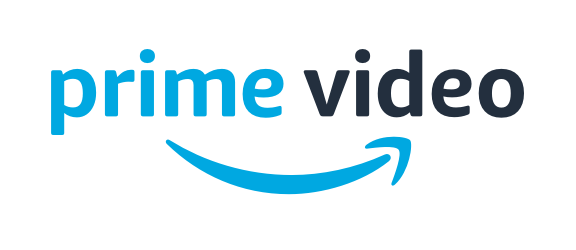

In [197]:
#Anderson Garcés
from IPython.display import display, Image

ruta_imagen = 'Prime_Video.png'

display(Image(filename=ruta_imagen))

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

In [198]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True) 
# write cf.getThemes() to find all themes available

In [199]:
cf.getThemes() 

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [200]:
df = pd.read_csv("amazon_prime.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [202]:
df.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [203]:
#Is there a reason why users are not allowed to know their country where to use the account?
df["country"].sample(20)


4562      NaN
8957      NaN
7140      NaN
6790      NaN
7402      NaN
6902      NaN
957       NaN
4121      NaN
3931      NaN
2185      NaN
6825      NaN
632       NaN
6676      NaN
1158      NaN
4496    India
772       NaN
4158      NaN
6168      NaN
7680      NaN
106       NaN
Name: country, dtype: object

Preserving the Unknown Location is an important piece of information to show in the results. For this reason, I replaced null values with Unknown

In [204]:
df["country"].value_counts()

country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: count, Length: 86, dtype: int64

In [205]:
frecuency_count = df["country"].value_counts().head(4)
frecuency_count

country
United States     253
India             229
United Kingdom     28
Canada             16
Name: count, dtype: int64

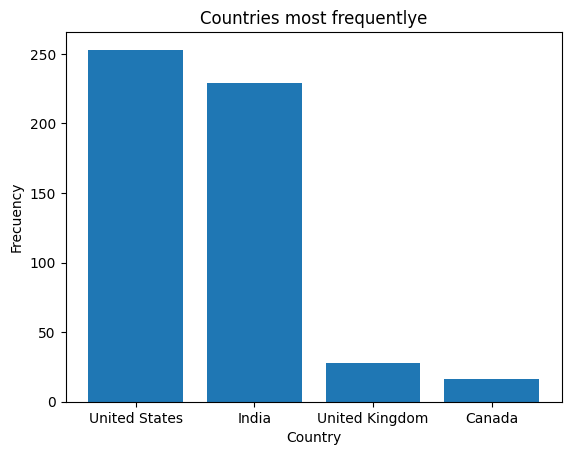

In [206]:
# Crea un gráfico de barras
plt.bar(frecuency_count.index, frecuency_count.values)

# Agrega etiquetas y título
plt.xlabel('Country')
plt.ylabel('Frecuency')
plt.title('Countries most frequentlye')

plt.show()

In [207]:
country_count = df["country"].value_counts().head(4)

In [208]:
def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

df['country_number'] = df['country'].apply(contar_palabras)

df[['country', 'country_number']].sample(10)


,country,country_number
1438,NaN,0
1800,NaN,0
1488,NaN,0
3670,NaN,0
2530,NaN,0
1182,NaN,0
4460,NaN,0
7453,NaN,0
944,NaN,0
6597,NaN,0


In [209]:
df_filtrado = df[df['country_number'] >= 2]
df_filtrado["country_number"].head(10)

165    2
175    2
193    2
255    2
261    3
365    3
366    3
373    4
455    2
546    3
Name: country_number, dtype: int64

There are 256 records that have two or more country locations

In [210]:
df_filtrado["country_number"].sum() 

256

In [211]:
def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

df['country_number'] = df['country'].apply(contar_palabras)

df[['country', 'country_number']].sample(10)

,country,country_number
7968,NaN,0
3932,NaN,0
7009,NaN,0
7795,NaN,0
4034,NaN,0
4419,NaN,0
5718,NaN,0
1726,NaN,0
1483,United States,1
3847,NaN,0


In [212]:

def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

df['country_number'] = df['country'].apply(contar_palabras)

# Cambiar "Country" a "Otros" si "country_number" es mayor o igual a 2
def reemplazar_con_otros(row):
    if row['country_number'] >= 2:
        return 'Several countries'
    else:
        return row['country']

df['country'] = df.apply(reemplazar_con_otros, axis=1)

# Eliminar la columna 'country_number' si ya no la necesitas
df.drop('country_number', axis=1, inplace=True)


In [213]:
df_filtrado_otros = df["country"].value_counts().head()


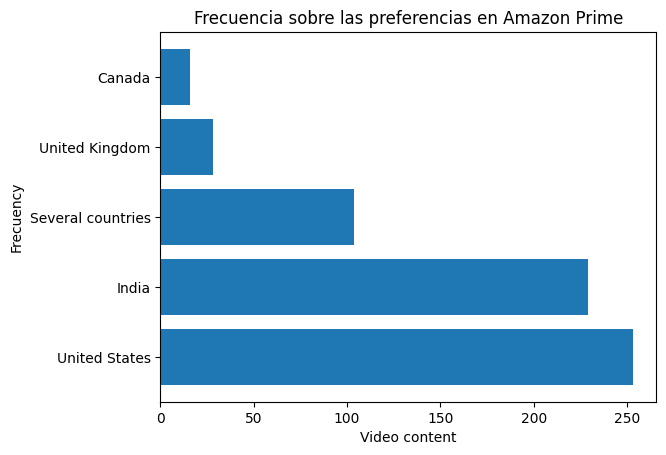

In [226]:
plt.barh(df_filtrado_otros.index, df_filtrado_otros.values)
df_filtrado_otros = df_filtrado_otros.sort_values(ascending=False)
plt.xlabel('Video content')
plt.ylabel('Frecuency')
plt.title('Frecuencia sobre las preferencias en Amazon Prime')

plt.show()

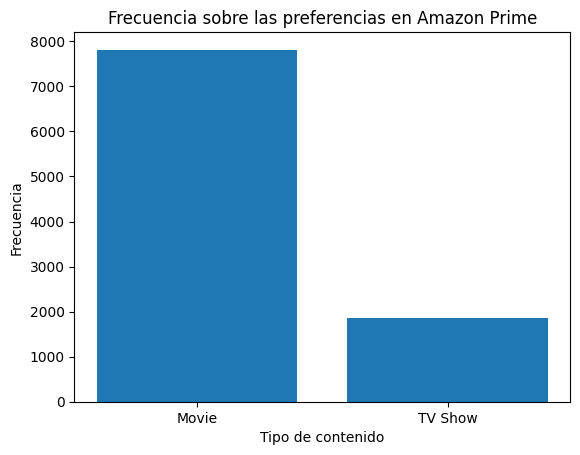

In [215]:
frecuencia = df['type'].value_counts()

plt.bar(frecuencia.index, frecuencia.values)

plt.xlabel('Tipo de contenido')
plt.ylabel('Frecuencia')
plt.title('Frecuencia sobre las preferencias en Amazon Prime')

plt.show()